In [1]:
# %matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection

## 1. Read the Data
First read in the dataframe. You'll notice it's similar to the dataframe that you ended the final solution with in Lesson 2, Exercise 4, only with more data:

In [2]:
d = pd.read_csv('findings_data_5000.csv')
d.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Atelectasis,3,79,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cardiomegaly|Edema|Effusion,4,55,F,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Consolidation|Mass,5,68,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 2. Understand the Distribution
Just like in Lesson 2, Exercise 4, we want to see how different diseases are distributed with our disease of interest, as well as how age and gender are distributed:

In [3]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

[Text(0, 0.5, 'Number of Images with Label')]

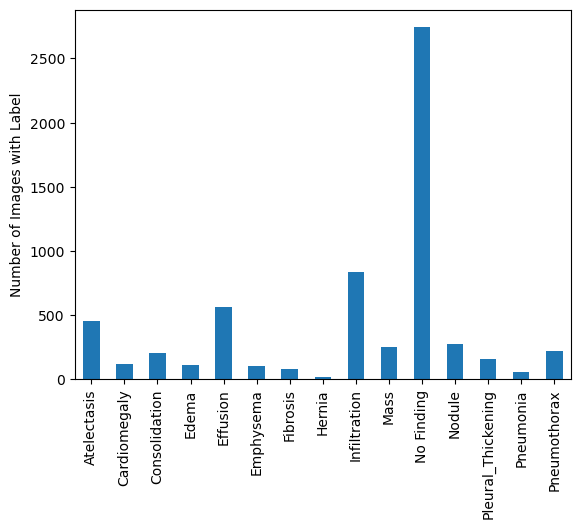

In [4]:
ax = d[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

**Since there are many combinations of potential findings, let's look at the 30 most common co-occurrences:**

<Axes: xlabel='Finding Labels'>

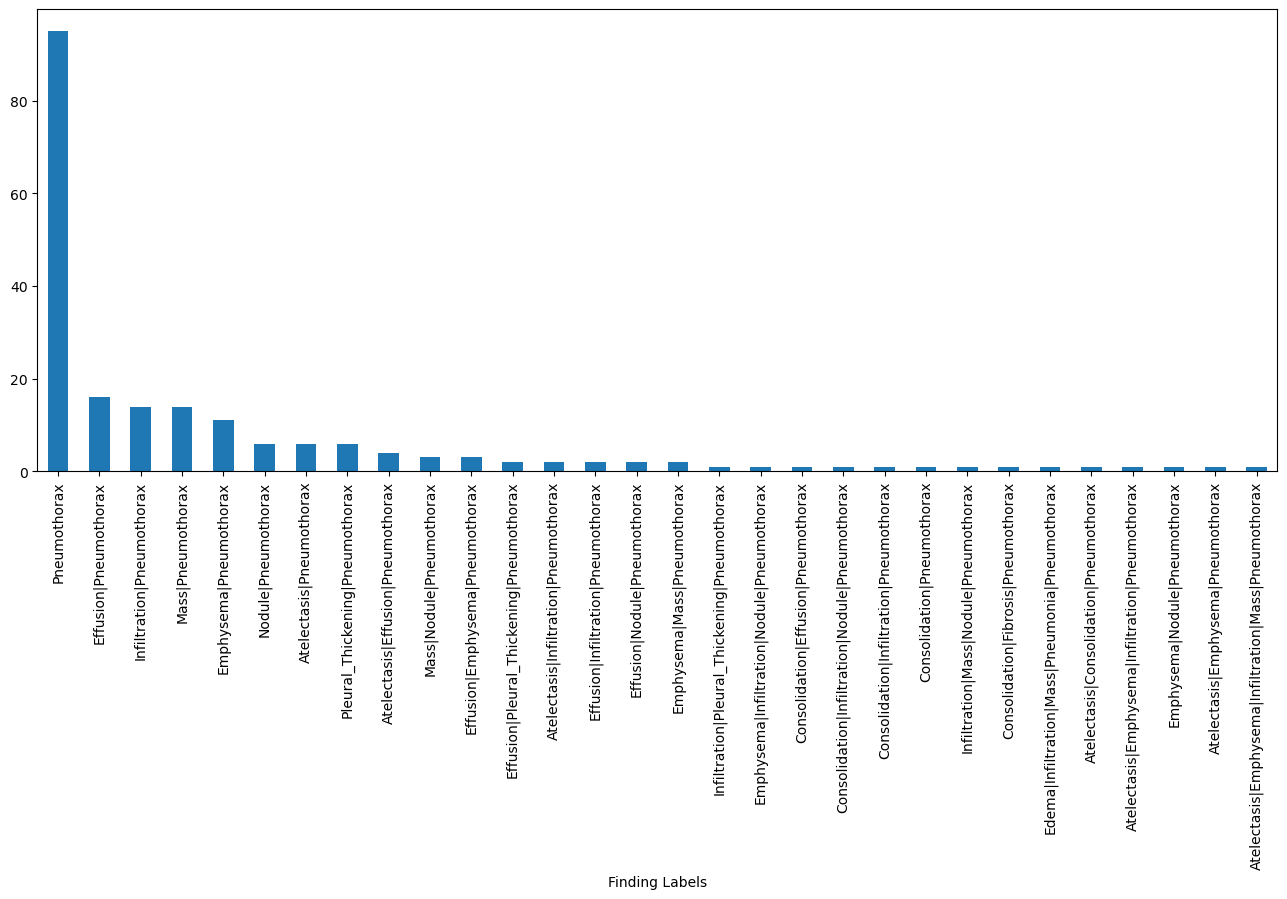

In [5]:
plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

<Axes: xlabel='Patient Gender'>

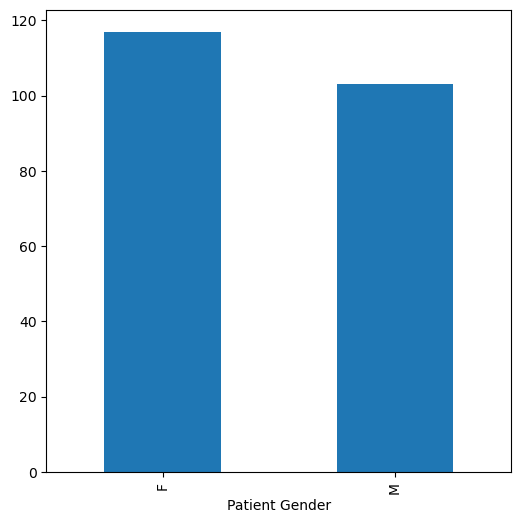

In [6]:
plt.figure(figsize=(6,6))
d[d.Pneumothorax ==1]['Patient Gender'].value_counts().plot(kind='bar')

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <BarContainer object of 10 artists>)

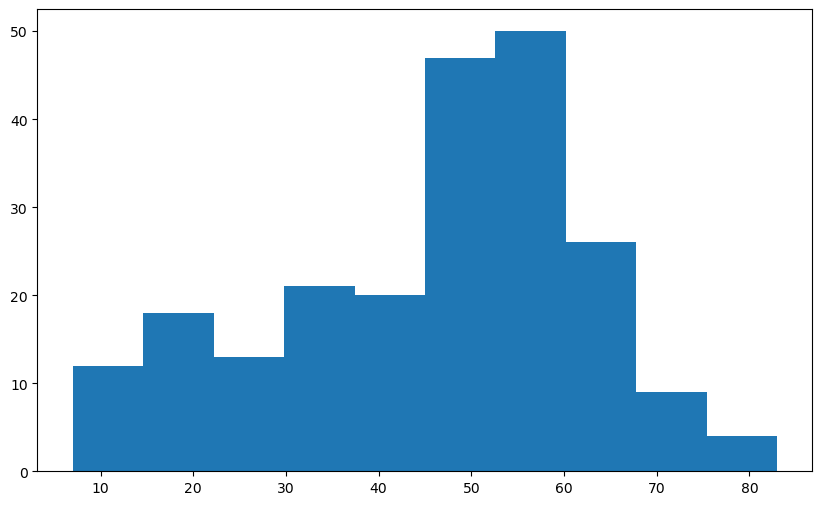

In [7]:
plt.figure(figsize=(10,6))
plt.hist(d[d.Pneumothorax==1]['Patient Age'])

## 3. To Do - Exercise - Split the Data into Train/Test Partitions
Now, knowing what we know from above, let's create the appropriate training and validation sets for a model that we want to train to classify the presence of a Pneumothorax. Also, take care of the following conditions: 
1. To have _EQUAL_ amount of positive and negative cases of Pneumothorax in Training
2. To have 20% positive cases of Pneumothorax in the Test Set

**Hint: you can random sample the negative cases to obtain a balanced training set.**

In [8]:
percent_positive = 100*(d['Pneumothorax']==1.0).sum()/len(d)
print(f'Only {percent_positive:.2f}% of the dataset is positive for Pneumothorax')
print(f'The total dataset has {(d["Pneumothorax"]==1.0).sum()} Pneumothorax cases')

Only 4.40% of the dataset is positive for Pneumothorax
The total dataset has 220 Pneumothorax cases


In [9]:
# 80%-20% split of the dataset. Use Pneumothorax to startify
d_train, d_test = sklearn.model_selection.train_test_split(d, test_size=0.2, stratify=d['Pneumothorax'])

In [10]:
### Plot Number of Pneumothorax cases in the train set (before balancing)
print(f'\nTrain Dataset without balancing:')
percent_positive = 100*(d_train['Pneumothorax']==1.0).sum()/len(d_train)
print(f'{percent_positive:.1f}% of the training dataset is positive for Pneumothorax')

### Balancing the train set
train_positive = d_train[d_train['Pneumothorax']==1]
# Randomly sample the same number of negative cases as in train_positive
train_negative = d_train[d_train['Pneumothorax']==0].sample(len(train_positive))
# Concatenate the positive and negative cases
d_train = pd.concat([train_positive, train_negative])

### Plot Number of Pneumothorax cases in the train set (after balancing)
print(f'\nTrain Dataset with balancing:')
percent_positive = 100*(d_train['Pneumothorax']==1.0).sum()/len(d_train)
print(f'{percent_positive:.1f}% of the training dataset is positive for Pneumothorax')




Train Dataset without balancing:
4.4% of the training dataset is positive for Pneumothorax

Train Dataset with balancing:
50.0% of the training dataset is positive for Pneumothorax


In [11]:
### Plot Number of Pneumothorax cases in the Test set (before making it 20% positive)
print(f'\nTest Dataset without balancing:')
percent_positive = 100*(d_test['Pneumothorax']==1.0).sum()/len(d_test)
print(f'{percent_positive:.1f}% of the test dataset is positive for Pneumothorax')

### Imposing 20% positive cases in the Test set
test_positive = d_test[d_test['Pneumothorax']==1]
# Randomly sample the same number of negative cases as in train_positive
total_num_samples_val = int(len(test_positive)*100/20)
negative_num_samples = total_num_samples_val - len(test_positive)
test_negative = d_test[d_test['Pneumothorax']==0].sample(negative_num_samples)
# Concatenate the positive and negative cases
d_test = pd.concat([test_positive, test_negative])

### Plot Number of Pneumothorax cases in the train set (after balancing)
print(f'\nTrain Dataset with balancing:')
percent_positive = 100*(d_test['Pneumothorax']==1.0).sum()/len(d_test)
print(f'{percent_positive:.1f}% of the test dataset is positive for Pneumothorax')


Test Dataset without balancing:
4.4% of the test dataset is positive for Pneumothorax

Train Dataset with balancing:
20.0% of the test dataset is positive for Pneumothorax


In [12]:
d_train.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
439,440,Pneumothorax,440,68,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2400,2401,Atelectasis|Nodule|Pneumothorax,2401,63,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4534,4535,Pneumothorax,4535,29,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,1698,Pneumothorax,1698,51,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1849,1850,Pneumothorax,1850,65,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
d_test.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
370,371,Pneumothorax,371,66,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3655,3656,Mass|Pneumothorax,3656,60,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3051,3052,Effusion|Pneumothorax,3052,42,M,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4585,4586,Pneumothorax,4586,63,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1030,1031,Pneumothorax,1031,28,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
